<a href="https://colab.research.google.com/github/harikrishna35/harikrishna35/blob/main/sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [55]:
sales_path="/sales"
file_name=os.listdir(sales_path)
yearly_sales=pd.DataFrame()
for file in file_name:
  temp_DataFrame=pd.read_csv(sales_path+'/'+file)
  yearly_sales=pd.concat([yearly_sales,temp_DataFrame])
  print(yearly_sales.head())

  Order ID  ...                       Purchase Address
0   141234  ...        944 Walnut St, Boston, MA 02215
1   141235  ...       185 Maple St, Portland, OR 97035
2   141236  ...  538 Adams St, San Francisco, CA 94016
3   141237  ...     738 10th St, Los Angeles, CA 90001
4   141238  ...          387 10th St, Austin, TX 73301

[5 rows x 6 columns]
  Order ID  ...                       Purchase Address
0   141234  ...        944 Walnut St, Boston, MA 02215
1   141235  ...       185 Maple St, Portland, OR 97035
2   141236  ...  538 Adams St, San Francisco, CA 94016
3   141237  ...     738 10th St, Los Angeles, CA 90001
4   141238  ...          387 10th St, Austin, TX 73301

[5 rows x 6 columns]
  Order ID  ...                       Purchase Address
0   141234  ...        944 Walnut St, Boston, MA 02215
1   141235  ...       185 Maple St, Portland, OR 97035
2   141236  ...  538 Adams St, San Francisco, CA 94016
3   141237  ...     738 10th St, Los Angeles, CA 90001
4   141238  ...      

In [56]:
print(yearly_sales.shape)

(186850, 6)


In [57]:
#clearing na coloums
yearly_sales[yearly_sales.isna().any(axis=1)]
print(yearly_sales.shape)
yearly_sales = yearly_sales.dropna(how = 'all')
print(yearly_sales.shape)

(186850, 6)
(186305, 6)


In [58]:
print(yearly_sales.dtypes)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object


In [59]:
yearly_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [60]:
print(yearly_sales.shape)
yearly_sales=yearly_sales[yearly_sales["Quantity Ordered"].str[0:1]!="Q"]
print(yearly_sales.shape)

(186305, 6)
(185950, 6)


In [61]:
yearly_sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [62]:
yearly_sales['Order ID']=pd.to_numeric(yearly_sales['Order ID'])
yearly_sales['Quantity Ordered']=pd.to_numeric(yearly_sales['Quantity Ordered'])
yearly_sales['Price Each']=pd.to_numeric(yearly_sales['Price Each'])

In [63]:
yearly_sales.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [64]:
yearly_sales["month"]=yearly_sales["Order Date"].str[0:2].astype('int8')
yearly_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


In [65]:
def get_city(Purchase_address):
  return Purchase_address.split(",")[1].strip(" ")

yearly_sales["city"]=yearly_sales['Purchase Address'].apply(get_city)

In [66]:
yearly_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,Austin


In [67]:
def get_state(purchase_address):
  return purchase_address.split(",")[2].split(" ")[1]

yearly_sales["state"]=yearly_sales["Purchase Address"].apply(get_state)

In [68]:
yearly_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,state
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,Boston,MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,Portland,OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco,CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles,CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,Austin,TX


In [69]:


yearly_sales["sales"]=yearly_sales[("Quantity Ordered")]*yearly_sales[("Price Each")]

In [70]:
yearly_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,state,sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,Boston,MA,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,Portland,OR,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco,CA,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles,CA,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,Austin,TX,11.99


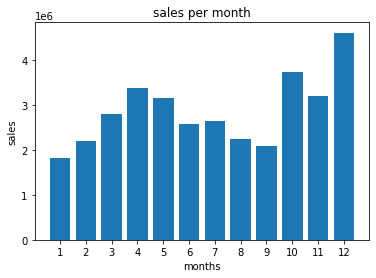

In [76]:

plt.bar(range(1,13),yearly_sales.groupby("month").sum()["sales"])
plt.xticks(range(1,13))
plt.xlabel("months")
plt.ylabel("sales")
plt.title("sales per month")
plt.show()

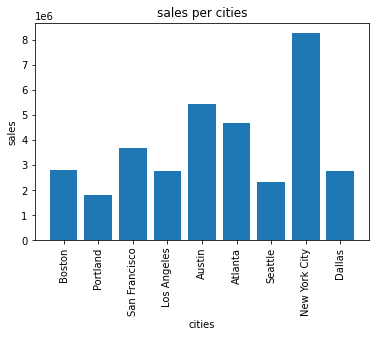

In [87]:
cities=yearly_sales["city"].unique()
plt.bar(cities,yearly_sales.groupby("city").sum()["sales"])
plt.xticks(cities,rotation='vertical')
plt.xlabel("cities")
plt.ylabel("sales")
plt.title("sales per cities")
plt.show()